In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import glob
import matplotlib.pyplot as plt


## MDTB as training dataset
MDTB dataset is used for training the models. 

In [6]:
def comb_eval(models=['Md_s1'],
              eval_data=["MDTB","WMFS", "Nishimoto", "Demand", "Somatotopic", "IBC"],
              cerebellum='SUIT3'):
    T = []
    for dataset in eval_data:
        for m in models:
            f = gl.conn_dir + f'/{cerebellum}/eval/{dataset}_eval_{m}.tsv'
            # get the dataframe
            dd = pd.read_csv(f, sep='\t')
            # add a column for the name of the dataset
            # get the noise ceilings
            
            # Remove negative values from dd.noise_X_R
            dd.noise_X_R = dd.noise_X_R.apply(lambda x: np.nan if x < 0 else x)
            dd.noise_Y_R = dd.noise_Y_R.apply(lambda x: np.nan if x < 0 else x)
            dd['noiseceiling_Y']=np.sqrt(dd.noise_Y_R)
            dd['noiseceiling_XY']=np.sqrt(dd.noise_Y_R)*np.sqrt(dd.noise_X_R)
            dd['R_eval_adj'] = dd.R_eval/dd["noiseceiling_XY"]
            T.append(dd)
    df = pd.concat(T,ignore_index=True)
    return df

In [7]:
df=comb_eval(models=['MDs1'])

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval'>

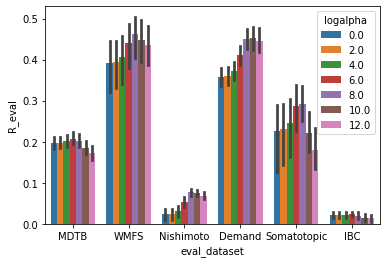

In [8]:
sns.barplot(data=df,x='eval_dataset',y='R_eval',hue='logalpha')

<AxesSubplot:xlabel='eval_dataset', ylabel='noiseceiling_XY'>

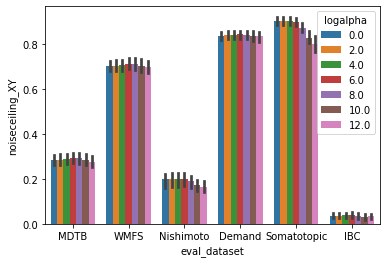

In [9]:
sns.barplot(data=df,x='eval_dataset',y='noiseceiling_XY',hue='logalpha')

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval_adj'>

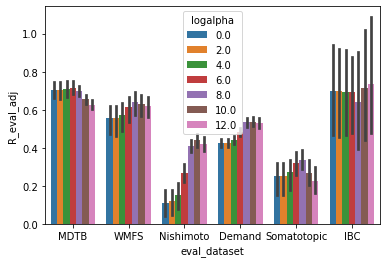

In [10]:
sns.barplot(data=df,x='eval_dataset',y='R_eval_adj',hue='logalpha')

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval_adj'>

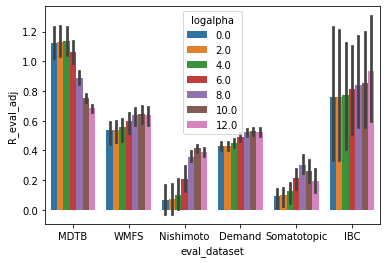

In [11]:
dfall=comb_eval(models=['MD'])
sns.barplot(data=dfall,x='eval_dataset',y='R_eval_adj',hue='logalpha')

##  All training data sets

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval'>

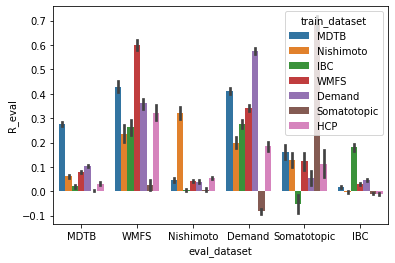

In [12]:
dfall=comb_eval(models=['Md','Ni','Ib','Wm','De','So','Hc'])
sns.barplot(data=dfall,x='eval_dataset',y='R_eval',hue='train_dataset')

In [13]:
dfall.to_csv('evaluation_results.csv')


In [14]:
dfall['nanY']=np.isnan(dfall.noiseceiling_Y)
dfall['nanXY']=np.isnan(dfall.noiseceiling_XY)
dfall['nanXR']=np.isnan(dfall.noise_X_R)



In [15]:
pd.pivot_table(data=dfall,index='train_dataset',columns='eval_dataset',values='nanXR',aggfunc='sum')

eval_dataset,Demand,IBC,MDTB,Nishimoto,Somatotopic,WMFS
train_dataset,,,,,,
Demand,0,7,0,0,0,0
HCP,12,57,0,0,1,10
IBC,0,15,0,0,0,0
MDTB,0,5,0,0,0,0
Nishimoto,0,18,0,0,0,0
Somatotopic,0,36,0,0,0,0
WMFS,0,0,0,0,2,0


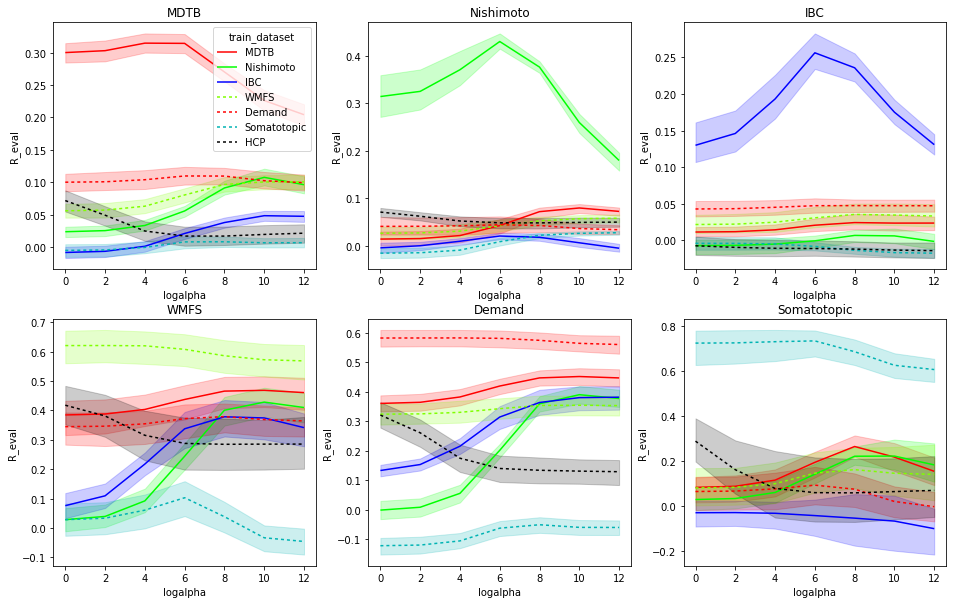

In [19]:
plt.figure(figsize=(16,10))
evd=['MDTB','Nishimoto','IBC','WMFS','Demand','Somatotopic']
palette = [[1,0,0],[0,1,0],[0,0,1],[0.5,1,0],[1,0,0],[0,0.7,0.7],[0,0,0]]
dashes = [[1,0],[1,0],[1,0],[2,2],[2,2],[2,2],[2,2]]

for i,ed in enumerate(evd):
    ax=plt.subplot(2,3,i+1)
    d=dfall[dfall.eval_dataset==ed]
    plt.title(ed)
    if i==0:
        sns.lineplot(data=d,y='R_eval',x='logalpha',hue='train_dataset',palette=palette,style='train_dataset',dashes=dashes)
    else: 
        sns.lineplot(data=d,y='R_eval',x='logalpha',hue='train_dataset',palette=palette,style='train_dataset',dashes=dashes,legend=None)


TODO: 
* HCP with lower log-alpha (-2,-4)
* One high log-alpha.... 
* Crossvalidate models on their own dataset across subjects